# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
- There were 124 females and 125 males in the study after duplicates were removed.
- Capomulin drug regimen was the most popular drug regimen used in the study with more than 250 mice being treated by this drug observed at time point. This number is cleaerly depicted on the Bar graph. On the other hand Zoniferol is the least popular regimen, based on the number of mice observed at time point.
- The line graph show that treatment by capomulin started showing signficant deacrease in tumor size at approximately time point "20.5" after the start of treatment.
- Based on the correlation coefficient of approximately 0.84, one can conclude that there seem to be a linear relationship between mouse weight and average tumor volume. This suggest that as the mouse weight increases, the average tumor volume will most likely to increase. This obersavtion is also supported by the visual presentation of the scatter plot, where the regression line overlay in a position which is consistent with positive correlation.

In [343]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import linregress, pearsonr
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
mouse_study_complete.head()
# Display the data table for preview
 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [344]:
# Checking the number of mice.
total_mice = len(mouse_study_complete["Mouse ID"].unique())
total_mice

249

In [345]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates= mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [346]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mice =mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989", :]
duplicate_mice= duplicates["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [347]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_ids = duplicates['Mouse ID'].unique()
clean_data = mouse_study_complete[~mouse_study_complete['Mouse ID'].isin(duplicate_ids)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [348]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(clean_data["Mouse ID"].unique())
total_mice_clean



248

## Summary Statistics

In [349]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
variance=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
standard_dev=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
sem=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()
summary_statistics=pd. DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std.Dev.":standard_dev,
    "Tumor Volume std.Err.":sem
})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [350]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var","std", "sem"])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Fig 1.1 showing number of mice treated per drug regimen')

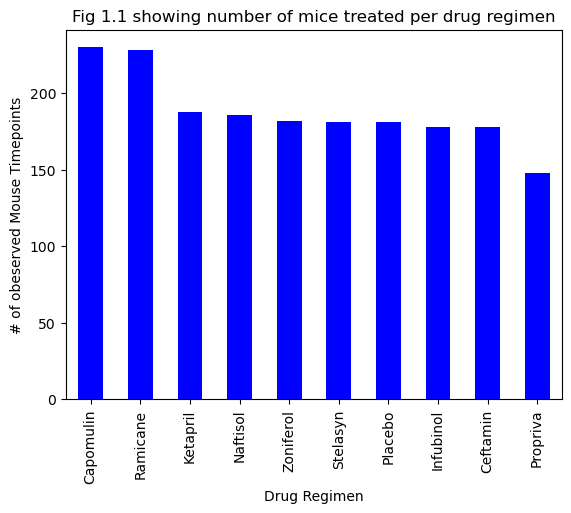

In [351]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#create a group series
mouse_count = clean_data["Drug Regimen"].value_counts()
mouse_count

bar_plot_pandas=mouse_count.plot.bar(color="b")

#Setting X Tittle labels, X labels and Y labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of obeserved Mouse Timepoints")
plt.title("Fig 1.1 showing number of mice treated per drug regimen") 

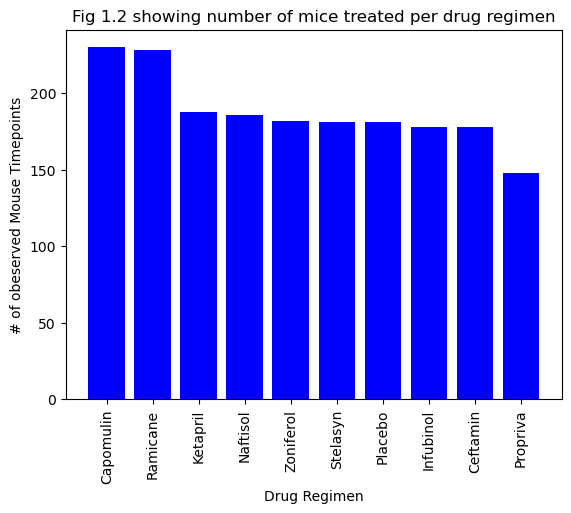

In [352]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count = clean_data["Drug Regimen"].value_counts()
x_axis =mouse_count.index.values
plt.bar(x_axis,mouse_count, color='b',align='center')
#Setting X Tittle labels, X labels and Y labels
plt.title("Fig 1.2 showing number of mice treated per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of obeserved Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

Text(0.5, 1.0, 'Fig 2.1 Showing Female versus Male in the study')

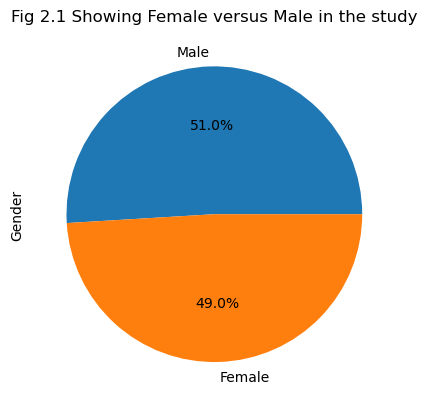

In [353]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Genger distribusion count
gender_distribution = clean_data["Sex"].value_counts()
gender_distribution

pie_plot_pandas=gender_distribution.plot.pie(autopct='%1.1f%%')

#Setting X Tittle labels, X labels and Y labels
plt.ylabel("Gender")
plt.title("Fig 2.1 Showing Female versus Male in the study") 

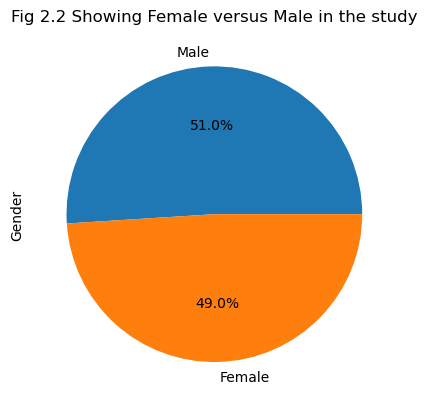

In [354]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
sizes =[51.0,49.0]
plt.pie(sizes,labels=gender,autopct='%1.1f%%', startangle=360)
#Setting X Tittle labels, X labels and Y labels
plt.ylabel("Gender")
plt.title("Fig 2.2 Showing Female versus Male in the study") 

plt.show()

## Quartiles, Outliers and Boxplots

In [355]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#List of specific treatments
selected_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints =clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
#Capomulin_volume = pd.DataFrame(Capomulin_greatest_timepoint)
#Capomulin_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_data, on=("Mouse ID","Timepoint"),how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [356]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_data[merged_data["Drug Regimen"].isin(selected_treatments)].copy()

# Create empty dictionary to fill with tumor vol data (for plotting)
tumor_volumes = {treatment: [] for treatment in selected_treatments}

# Loop through each treatment
for treatment in selected_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = treatments[treatments["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add subset to dictionary
    tumor_volumes[treatment] = treatment_data.tolist()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the treatment
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Identify lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine outliers using the bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"Treatment: {treatment}")
    print(f"Outliers: {outliers}\n")




Treatment: Capomulin
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Infubinol
Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



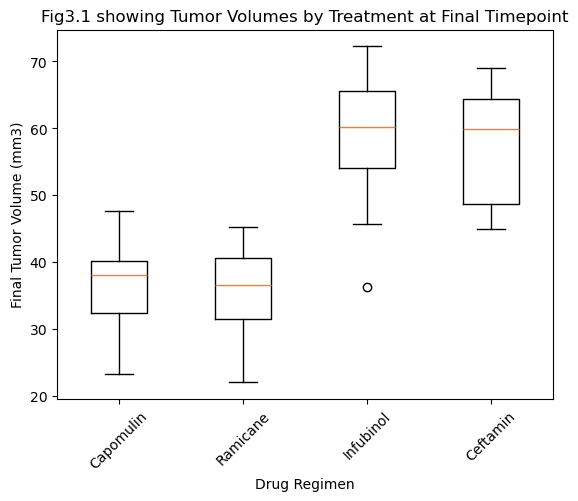

In [357]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [tumor_volumes[treatment] for treatment in selected_treatments]
#data_to_plot
plt.boxplot(data_to_plot, labels=selected_treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Fig3.1 showing Tumor Volumes by Treatment at Final Timepoint')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

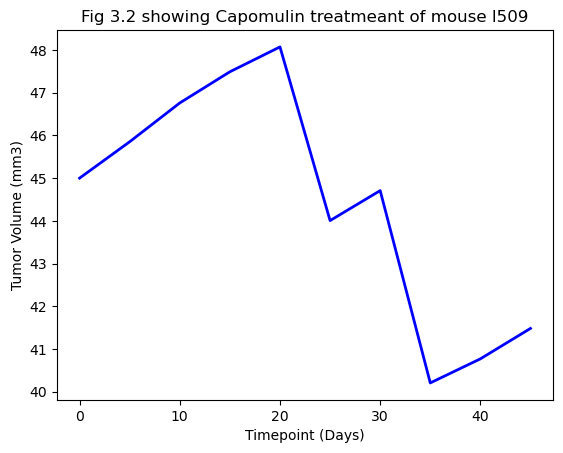

In [358]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_scatter_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "l509",:]
line_scatter_data.head()
x_axis = line_scatter_data["Timepoint"]
tumorsize = line_scatter_data["Tumor Volume (mm3)"]

fig2, ax1 = plt.subplots()
plt.title('Fig 3.2 showing Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumorsize,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

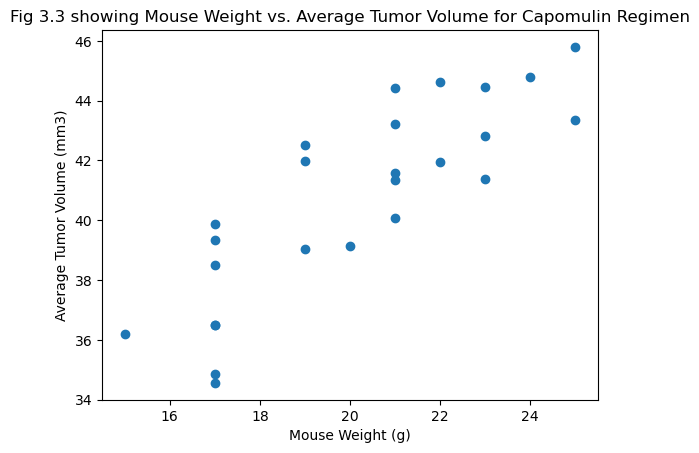

In [359]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig3, ax1 = plt.subplots()

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] =="Capomulin"]

# Calculate the average tumor volume per mouse
capomulin_grouped=capomulin_data.groupby("Mouse ID").agg({
                                         "Tumor Volume (mm3)": 'mean',
                                         "Weight (g)": 'mean'
                                         }).reset_index()
#Renaming columns
capomulin_grouped.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"}, inplace=True)

# Generate the scatter plot
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Average Tumor Volume'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Fig 3.3 showing Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


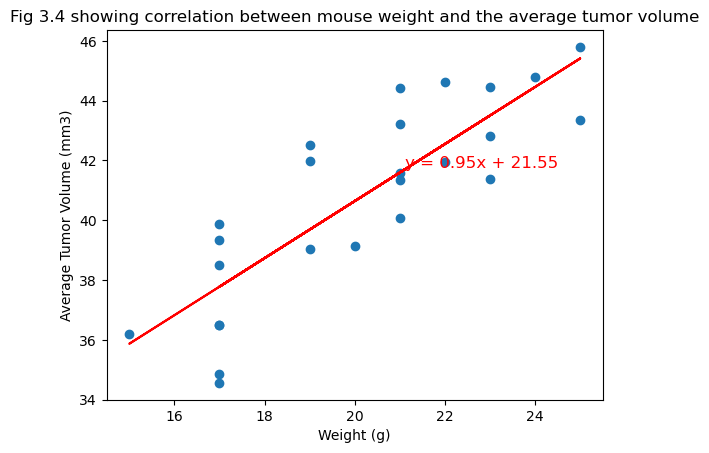

In [360]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient using Pearson's method
correlation, _ = pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Average Tumor Volume'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

# Perform linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Average Tumor Volume'])

# Calculate regression line values
regress_values = capomulin_grouped['Weight (g)'] * slope + intercept

# Plot regression line
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Average Tumor Volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Fig 3.4 showing correlation between mouse weight and the average tumor volume')
plt.plot(capomulin_grouped['Weight (g)'], regress_values, "r-")
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (capomulin_grouped['Weight (g)'].mean() + 1, capomulin_grouped['Average Tumor Volume'].mean() + 1), fontsize=12, color='red')

# Show the plot
plt.show()